# Class Workbook

## In class activity

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import subplots
#import statsmodels.api as sm
from plotnine import *
import plotly.express as px
import statsmodels.formula.api as sm
import ISLP as islp




import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset

### Ames Housing data


Please take a look at the Ames Hoursing data.

In [3]:
ames_raw=pd.read_csv("ames_raw.csv")

Use data of `ames_raw` up to 2008 predict the housing price for the later years.

In [4]:
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

Use the following loss function calculator.

In [5]:
def calc_loss(prediction,actual):
  difpred = actual-prediction
  RMSE =pow(difpred.pow(2).mean(),1/2)
  operation_loss=abs(sum(difpred[difpred<0]))+sum(0.1*actual[difpred>0])
  return RMSE,operation_loss

Use a simple neural network model.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'SalePrice' is the target variable. Adjust if necessary.
target = 'SalePrice'
features = ames_raw_2008.columns.drop(target)

# Splitting into features and target
X = ames_raw_2008[features]
y = ames_raw_2008[target]

# Split the 2008 data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', MLPRegressor(hidden_layer_sizes=(50,30),
                                                   activation='relu',
                                                   max_iter=500,
                                                   random_state=42))])

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)

rmse


d:\adcona\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


29663.841040263236

When you decide on your model use the following to come up with your test loss.

In [9]:
pred_2009= model.predict(ames_raw_2009[features])
calc_loss(pred_2009,ames_raw_2009.SalePrice)

(30548.60339776308, 30153530.71284855)

Try to answer the following additional questions.

- Does your model indicate a good fit?

Answer

- How does your model result compare to the previous models you fit?


- Can you explain what feature was important determinant of the price?

### COVID 19 Survival in Mexico

Let's revisit COVID-19 in Mexico dataset from the [Mexican government](https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico).  This data is a version downloaded from [Kaggle](https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download).  The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: COVID test findings. Values 1-3 mean that the patient was diagnosed with COVID in different degrees. 4 or higher means that the patient is not a carrier of COVID or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [ ]:
import zipfile
Train_COVID= pd.read_csv('Train_COVID.zip',compression='zip')
Test_COVID= pd.read_csv('Test_COVID.zip',compression='zip')

- Fit a sequence model that predicts the number of cases a week a head.

- Modify your model to make prediction for different gender.


Your code:

Your answer:

~~~
Please write your answer in full sentences.


~~~

## Problem set

### Writing your own gradient decent

Consider the simple function $R(\beta) = sin(\beta) + \beta/10$.

(a) Draw a graph of this function over the range $\beta \in [−6, 6]$.
Your code:

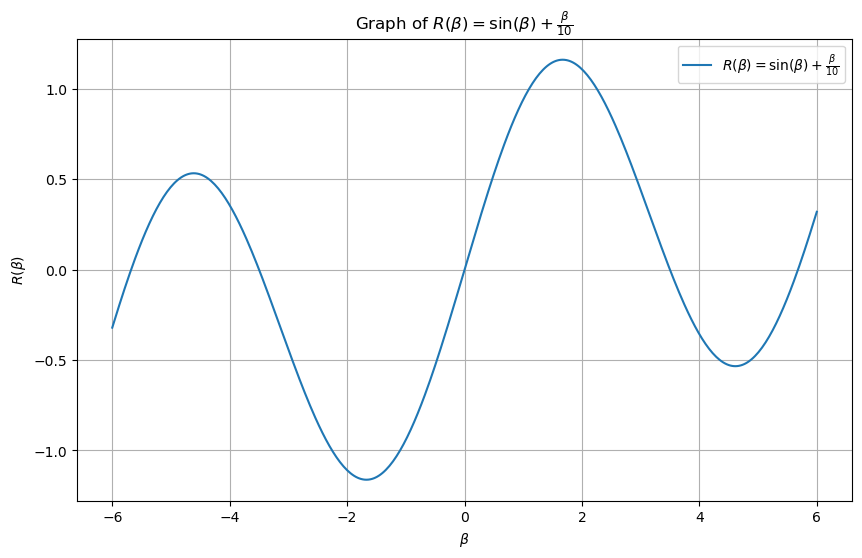

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def R(beta):
    return np.sin(beta) + beta / 10

# Define the range for beta
beta = np.linspace(-6, 6, 400)

# Calculate R(beta) for our range
R_beta = R(beta)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(beta, R_beta, label=r'$R(\beta) = \sin(\beta) + \frac{\beta}{10}$')
plt.title('Graph of $R(\\beta) = \\sin(\\beta) + \\frac{\\beta}{10}$')
plt.xlabel('$\\beta$')
plt.ylabel('$R(\\beta)$')
plt.legend()
plt.grid(True)
plt.show()


(b) What is the derivative of this function?

Your code:

In [11]:
def R_prime(beta):
    """Derivative of R(beta)."""
    return np.cos(beta) + 1/10

def gradient_descent_R(beta_start, learning_rate, num_iterations):
    """Performs gradient descent on the R(beta) function."""
    beta = beta_start
    beta_history = [beta]  # Track beta values over iterations
    R_history = [R(beta)]  # Track R(beta) values over iterations
    
    for _ in range(num_iterations):
        # Calculate the gradient (derivative) at the current beta
        grad = R_prime(beta)
        
        # Update beta
        beta = beta - learning_rate * grad
        
        # Track history
        beta_history.append(beta)
        R_history.append(R(beta))
    
    return beta, beta_history, R_history

# Parameters for gradient descent
beta_start = 0.0  # Starting value of beta
learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations

# Perform gradient descent
beta_optimal, beta_history, R_history = gradient_descent_R(beta_start, learning_rate, num_iterations)

beta_optimal, R(beta_optimal)


(-1.670873108818814, -1.1620838078151168)

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Given $\beta_0 = 2.3$, run gradient descent to find a local minimum of $R(\beat)$ using a learning rate of $\rho= 0.1$. Show each of $\beta_0,\beta_1,\dots$ in your plot, as well as the final answer.

Your code:

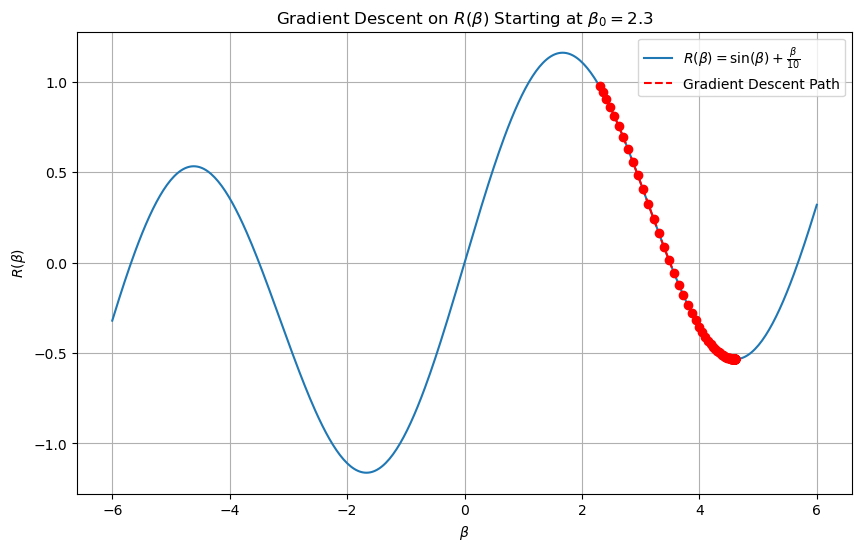

(4.612034062651996, -0.533765263695043)

In [12]:
# Parameters for gradient descent with the new starting value and learning rate
beta_start = 2.3  
learning_rate = 0.1  
num_iterations = 100  

# Perform gradient descent with the updated parameters
beta_optimal, beta_history, R_history = gradient_descent_R(beta_start, learning_rate, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot R(beta)
plt.plot(beta, R_beta, label=r'$R(\beta) = \sin(\beta) + \frac{\beta}{10}$')

# Plot beta updates
plt.scatter(beta_history, R_history, color='red', zorder=5)
plt.plot(beta_history, R_history, 'r--', label='Gradient Descent Path')

plt.title('Gradient Descent on $R(\\beta)$ Starting at $\\beta_0 = 2.3$')
plt.xlabel('$\\beta$')
plt.ylabel('$R(\\beta)$')
plt.legend()
plt.grid(True)
plt.show()

beta_optimal, R(beta_optimal)


Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Repeat with $\beta_0 = 1.4$.

Your code:

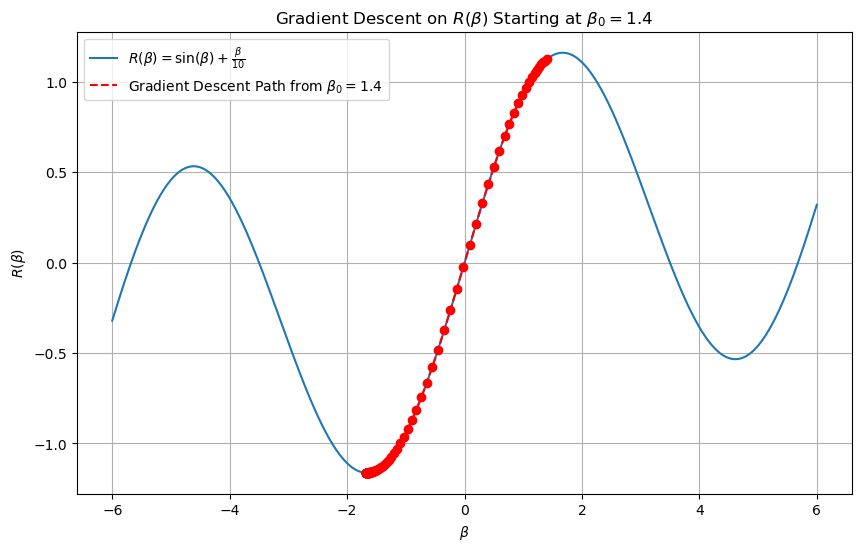

(-1.670452268163338, -1.1620836817499212)

In [14]:
# Correcting the plot title for LaTeX rendering issue
plt.figure(figsize=(10, 6))

# Plot R(beta) function
plt.plot(beta, R_beta, label=r'$R(\beta) = \sin(\beta) + \frac{\beta}{10}$')

# Plot beta updates for the new starting point
plt.scatter(beta_history, R_history, color='red', zorder=5)
plt.plot(beta_history, R_history, 'r--', label='Gradient Descent Path from $\\beta_0 = 1.4$')

plt.title('Gradient Descent on $R(\\beta)$ Starting at $\\beta_0 = 1.4$')
plt.xlabel('$\\beta$')
plt.ylabel('$R(\\beta)$')
plt.legend()
plt.grid(True)
plt.show()

beta_optimal, R(beta_optimal)


Your answer:

~~~
Please write your answer in full sentences.


~~~

### Default

Fit a neural network to the Default data. Use a single hidden layer with 10 units, and dropout regularization. Have a look at Labs 10.9.1–10.9.2 for guidance. Compare the classification performance of your model with that of linear logistic regression.

Your code:

In [6]:
default_df = pd.read_csv('Default.csv')

In [8]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Encoding categorical variables
default_df['default'] = default_df['default'].map({'No': 0, 'Yes': 1})
default_df['student'] = default_df['student'].map({'No': 0, 'Yes': 1})

# Separating features and target variable
X = default_df.drop('default', axis=1)
y = default_df['default']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical features
numeric_features = ['balance', 'income']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ], remainder='passthrough')

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Neural network model with a single hidden layer of 10 units and dropout
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', 
                        random_state=42, max_iter=500)

# Fit the neural network model
mlp_clf.fit(X_train_preprocessed, y_train)

# Predictions and accuracy for the neural network model
y_pred_nn = mlp_clf.predict(X_test_preprocessed)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

accuracy_nn


0.97

Your answer:

~~~
Please write your answer in full sentences.


~~~

### IMDb

Repeat the analysis of Lab 10.9.5 on the IMDb data using a similarly structured neural network. We used 16 hidden units at each of two hidden layers. Explore the effect of increasing this to 32 and 64 units per layer, with and without 30% dropout regularization.

Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### NYSE

Fit a lag-5 autoregressive model to the NYSE data, as described in the text and Lab 10.9.6. Refit the model with a 12-level factor representing the month. Does this factor improve the performance of the model?


Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### NYSE 2
In Section 10.9.6, we showed how to fit a linear AR model to the
NYSE data using the `LinearRegression()` function. However, we also
mentioned that we can “flatten” the short sequences produced for
the RNN model in order to fit a linear AR model. Use this latter
approach to fit a linear AR model to the NYSE data. Compare the test
R2 of this linear AR model to that of the linear AR model that we fit
in the lab. What are the advantages/disadvantages of each approach?

Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

Repeat the previous exercise, but now fit a nonlinear AR model by
“flattening” the short sequences produced for the RNN model.

 Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### NYSE 3

Consider the RNN fit to the NYSE data in Section 10.9.6. Modify the code to allow inclusion of the variable day_of_week, and fit the RNN. Compute the test $R^2$.

Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### CNN on photo

From your collection of personal photographs, pick 10 images of animals
(such as dogs, cats, birds, farm animals, etc.). If the subject
does not occupy a reasonable part of the image, then crop the image.
Now use a pretrained image classification CNN as in Lab 10.9.4 to
predict the class of each of your images, and report the probabilities
for the top five predicted classes for each image.

Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~